# Home Alarm CLV


## Key Assumption
1. <b>Churn</b>: Customers renew their contracts only at the end of each year. Therefore, the retention rate during one year will keep stable all 12 months.
2. <b>Payment</b>: All customers will be charge at the end of each month regardless of the payment type.
3. <b>Cohort</b>: Existing residential customers who are about to start their 2nd year with Home Alarm. Therefore, the retention rate in the actual year 2 ( CLV year 1) will be 100%.




### Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Import data
churn = pd.DataFrame(
    {
        "autopay": [0.032, 0.070, 0.097, 0.103, 0.095, 0.078, 0.069, 0.059, 0.053],
        "no_autopay": [0.084, 0.122, 0.162, 0.154, 0.134, 0.120, 0.111, 0.096, 0.086],
    }
)

Now we are at the beginning of the second year which should be our first year to calculate CLV. Therefore the churn rate for the 9th year (8th ClV year) is not necessary and the 1st CLV year's churn rate should be 0

In [3]:
churn8 = churn.iloc[:-1,:].copy() ## remove last year
# yearly churn rate, since we start from second year, we should delete the information for first year.
churn8.iloc[0,]= 0

In [4]:
churn8

,autopay,no_autopay
0,0.000,0.000
1,0.070,0.122
2,0.097,0.162
3,0.103,0.154
4,0.095,0.134
5,0.078,0.120
6,0.069,0.111
7,0.059,0.096


### List assumptions that apply to both autopay and non-autopay customers

In [5]:
# list your assumptions here
monthly_revenue = 40
annual_growth = 0.03
annual_discount_rate = 0.1
monthly_discount_rate = (1+annual_discount_rate)**(1/12)-1
cost_service = 0.15
marketing_cost = 0.05
nr_years = 8

In [6]:
time = np.arange(1, nr_years * 12+ 1) ## payments occur at the end of each month
growth = np.power(1+annual_growth,np.arange(0,nr_years)).repeat(12)

### Calculate CLV for non-autopay customers

In [7]:
retention_nap = (1-churn8.no_autopay).cumprod().repeat(12)
retention_nap.values.round(3)

array([1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 0.878, 0.878, 0.878, 0.878, 0.878, 0.878,
       0.878, 0.878, 0.878, 0.878, 0.878, 0.878, 0.736, 0.736, 0.736,
       0.736, 0.736, 0.736, 0.736, 0.736, 0.736, 0.736, 0.736, 0.736,
       0.622, 0.622, 0.622, 0.622, 0.622, 0.622, 0.622, 0.622, 0.622,
       0.622, 0.622, 0.622, 0.539, 0.539, 0.539, 0.539, 0.539, 0.539,
       0.539, 0.539, 0.539, 0.539, 0.539, 0.539, 0.474, 0.474, 0.474,
       0.474, 0.474, 0.474, 0.474, 0.474, 0.474, 0.474, 0.474, 0.474,
       0.422, 0.422, 0.422, 0.422, 0.422, 0.422, 0.422, 0.422, 0.422,
       0.422, 0.422, 0.422, 0.381, 0.381, 0.381, 0.381, 0.381, 0.381,
       0.381, 0.381, 0.381, 0.381, 0.381, 0.381])

In [8]:
revenues_nap = monthly_revenue * growth
service_nap = revenues_nap * cost_service
marketing_nap = revenues_nap * marketing_cost
profit_nap = revenues_nap-service_nap-marketing_nap
expected_profit_nap = profit_nap * retention_nap

pv_expected_profit_nap = expected_profit_nap/np.power(1+monthly_discount_rate,time)
clv_nap = np.cumsum(pv_expected_profit_nap)

In [9]:
clv_nap

0      31.746846
0      63.242541
0      94.489072
0     125.488410
0     156.242510
        ...     
7    1525.389453
7    1532.557435
7    1539.668710
7    1546.723728
7    1553.722933
Name: no_autopay, Length: 96, dtype: float64

### Calculate CLV for autopay customers

In [10]:
retention_ap = (1-churn8.autopay).cumprod().repeat(12)
retention_ap.values.round(3)

array([1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 0.93 , 0.93 , 0.93 , 0.93 , 0.93 , 0.93 ,
       0.93 , 0.93 , 0.93 , 0.93 , 0.93 , 0.93 , 0.84 , 0.84 , 0.84 ,
       0.84 , 0.84 , 0.84 , 0.84 , 0.84 , 0.84 , 0.84 , 0.84 , 0.84 ,
       0.753, 0.753, 0.753, 0.753, 0.753, 0.753, 0.753, 0.753, 0.753,
       0.753, 0.753, 0.753, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682,
       0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.629, 0.629, 0.629,
       0.629, 0.629, 0.629, 0.629, 0.629, 0.629, 0.629, 0.629, 0.629,
       0.585, 0.585, 0.585, 0.585, 0.585, 0.585, 0.585, 0.585, 0.585,
       0.585, 0.585, 0.585, 0.551, 0.551, 0.551, 0.551, 0.551, 0.551,
       0.551, 0.551, 0.551, 0.551, 0.551, 0.551])

In [11]:
revenues_ap = monthly_revenue * growth
service_ap = revenues_ap * cost_service
marketing_ap = revenues_ap * marketing_cost
profit_ap = revenues_ap-service_ap-marketing_ap
expected_profit_ap = profit_ap * retention_ap

pv_expected_profit_ap = expected_profit_ap/np.power(1+monthly_discount_rate,time)
clv_ap = np.cumsum(pv_expected_profit_ap)

In [12]:
clv_ap

0      31.746846
0      63.242541
0      94.489072
0     125.488410
0     156.242510
        ...     
7    1762.733926
7    1773.087712
7    1783.359589
7    1793.550204
7    1803.660201
Name: autopay, Length: 96, dtype: float64

### Create a line graph of CLV for both autopay and non-autopay customers 

In [13]:
homealarm = pd.DataFrame(
    {"Time": time, "autopay": clv_ap, "no_autopay": clv_nap}
)

homealarm

,Time,autopay,no_autopay
0,1,31.746846,31.746846
0,2,63.242541,63.242541
0,3,94.489072,94.489072
0,4,125.488410,125.488410
0,5,156.242510,156.242510
...,...,...,...
7,92,1762.733926,1525.389453
7,93,1773.087712,1532.557435
7,94,1783.359589,1539.668710
7,95,1793.550204,1546.723728


<AxesSubplot:xlabel='Time', ylabel='CLV'>

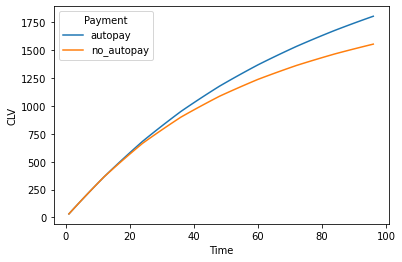

In [14]:
# enter your code here to create a single plot with 2-lines
homealarm_long= pd.melt(homealarm, id_vars=['Time'], value_vars=['autopay','no_autopay'],
        var_name='Payment', value_name='CLV')
sns.lineplot(data=homealarm_long, x='Time',y='CLV',hue='Payment')

### Create a line graph of the retention rate for both autopay and non-autopay customer 

<AxesSubplot:xlabel='Time', ylabel='Retention'>

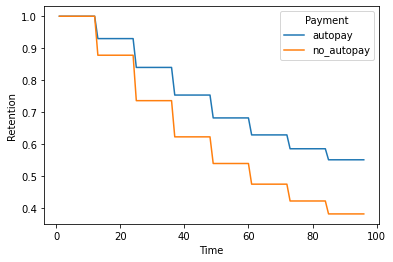

In [15]:
# enter your code here to create a single plot with 2-lines
retention_rate = pd.DataFrame(
    {"Time": time, "autopay": retention_ap, "no_autopay": retention_nap}
)
retention_long= pd.melt(retention_rate, id_vars=['Time'], value_vars=['autopay','no_autopay'],
        var_name='Payment', value_name='Retention')
sns.lineplot(data=retention_long, x='Time',y='Retention',hue='Payment')

### Summary

In [16]:
print(
"CLV w/o Autopay: $", round(homealarm['no_autopay'].iloc[-1],2),
"\nCLV with Autopay: $", round(homealarm['autopay'].iloc[-1],2),
"\nTherefore, we should never spend more than $",round(homealarm['autopay'].iloc[-1] - homealarm['no_autopay'].iloc[-1] ,2),"based on 8-year CLV calculation"
)

CLV w/o Autopay: $ 1553.72 
CLV with Autopay: $ 1803.66 
Therefore, we should never spend more than $ 249.94 based on 8-year CLV calculation


In [17]:
y3 = homealarm[homealarm['Time']==36]
clv_nap_yr3 = round(float(y3['no_autopay']),2)
clv_ap_yr3 = round(float(y3['autopay']),2)

In [18]:
print(f"However, 8-year is a long time, we may reduce the risk use a shorter time frame,e.g., 3-year CLV.\nThen the maximum homealarm would spend is ${clv_ap_yr3} - ${clv_nap_yr3} = ${round(clv_ap_yr3-clv_nap_yr3,2)}")

However, 8-year is a long time, we may reduce the risk use a shorter time frame,e.g., 3-year CLV.
Then the maximum homealarm would spend is $951.12 - $900.08 = $51.04
